In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
A = pd.read_csv("C:\\Users\\amith\\OneDrive\\Documents\\Project\\final_data.csv")
A.shape
A.columns
A.info()
A.isna().sum()
Ag = A.drop(["Unnamed: 0","Patient ID","pincode","Age","Test Booking Date","Test Booking Time HH:MM","Sample Collection Date"],axis=1)
Ag.describe() #EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 26 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1304 non-null   int64  
 1   Patient ID                                    1304 non-null   object 
 2   Agent ID                                      1304 non-null   int64  
 3   pincode                                       1304 non-null   object 
 4   patient location                              1304 non-null   object 
 5   Latitudes and Longitudes (Patient)            1304 non-null   object 
 6   Latitudes and Longitudes (Agent)              1304 non-null   object 
 7   Latitudes and Longitudes (Diagnostic Center)  1304 non-null   object 
 8   Diagnostic Centers                            1304 non-null   object 
 9   Time slot                                     1304 non-null   o

,Agent ID,shortest distance Agent-Pathlab(m),shortest distance Patient-Pathlab(m),shortest distance Patient-Agent(m),Time For Sample Collection MM,Time Agent-Pathlab sec,Exact Arrival Time MM
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000
mean,29.796779,3493.313650,4772.600460,3543.828988,12.569018,349.331365,36.672546
std,11.605935,8462.425985,8904.195019,5914.498925,4.621664,846.242599,10.873626
min,10.000000,0.000000,0.000000,0.000000,5.000000,0.000000,24.000000
25%,20.000000,269.750000,696.500000,383.250000,9.000000,26.975000,24.000000
50%,30.000000,1319.000000,2564.500000,1183.000000,13.000000,131.900000,39.000000
75%,39.250000,4154.250000,7006.500000,4187.250000,17.000000,415.425000,39.000000
max,50.000000,248617.000000,248952.000000,67593.000000,20.000000,24861.700000,64.000000


<BarContainer object of 1304 artists>

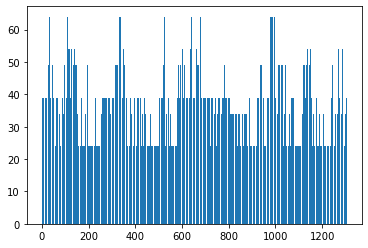

In [3]:
# Data Visualization
plt.bar(height = Ag["Exact Arrival Time MM"],x = np.arange(1,1305,1))


In [4]:
# Data Preprocessing
# Duplicates
# Identify the duplicates in the dataset
duplicate = Ag.duplicated()
sum(duplicate)

0

In [165]:
df = Ag[["Agent ID","Diagnostic Centers","Time slot","shortest distance Agent-Pathlab(m)","shortest distance Patient-Pathlab(m)",
         "Availabilty time (Patient)","Gender","Way Of Storage Of Sample","shortest distance Patient-Agent(m)",
         "Time Agent-Pathlab sec"," Time For Sample Collection MM","Agent Arrival Time (range) HH:MM","Exact Arrival Time MM"]]


In [166]:
df.columns

Index(['Agent ID', 'Diagnostic Centers', 'Time slot',
       'shortest distance Agent-Pathlab(m)',
       'shortest distance Patient-Pathlab(m)', 'Availabilty time (Patient)',
       'Gender', 'Way Of Storage Of Sample',
       'shortest distance Patient-Agent(m)', 'Time Agent-Pathlab sec',
       ' Time For Sample Collection MM', 'Agent Arrival Time (range) HH:MM',
       'Exact Arrival Time MM'],
      dtype='object')

In [167]:
df.rename(columns={'shortest distance Agent-Pathlab(m)' : 'Distance Agent-Pathlab', 
                   'shortest distance Patient-Pathlab(m)' : 'Distance Patient-Pathlab',  
                   'shortest distance Patient-Agent(m)' : 'Distance Patient-Agent',  
                   'Availabilty time (Patient)' : 'Patient Availabilty',  
                   'Test Booking Date' : 'Booking Date',  
                   'Test Booking Time HH:MM' : 'Booking Time',
                   'Way Of Storage Of Sample' : 'Specimen Storage',
                   ' Time For Sample Collection MM' : 'Specimen collection Time',
                   'Time Agent-Pathlab sec' : 'Agent-Pathlab sec',
                   'Agent Arrival Time (range) HH:MM' : 'Agent Arrival Time',
                   'Exact Arrival Time MM' : 'Exact Arrival Time'   
                  }, inplace=True)
df.columns

Index(['Agent ID', 'Diagnostic Centers', 'Time slot', 'Distance Agent-Pathlab',
       'Distance Patient-Pathlab', 'Patient Availabilty', 'Gender',
       'Specimen Storage', 'Distance Patient-Agent', 'Agent-Pathlab sec',
       'Specimen collection Time', 'Agent Arrival Time', 'Exact Arrival Time'],
      dtype='object')

In [168]:
list(df['Diagnostic Centers'].unique())

['Medquest Diagnostics Center',
 'Vijaya Diagnostic Center',
 'Apollo Diagnostics',
 'Lucid Medical Diagnostics',
 'Vivaa Diagnostic Center',
 'Medifine Diagnostic Center',
 'Diamond Diagnostic Center',
 'Tesla Diagnostics',
 'Pronto Diagnostics Center',
 'Sri Sai Diagnostic Center',
 'Vijaya Diagonstic Center',
 'Medquest Diagnostics',
 'Pronto Diagnostics',
 'Viva Diagnostic']

<AxesSubplot:>

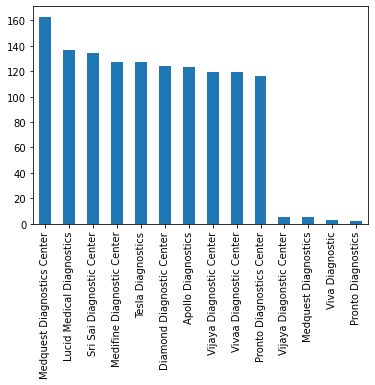

In [169]:
df['Diagnostic Centers'].value_counts().plot(kind = 'bar')

In [174]:
def name_change(text):
    if text == 'Medquest Diagnostics Center' or text == 'Medquest Diagnostics':
        return 'Medquest Diagnostics Center'
    elif text == 'Pronto Diagnostics' or text == 'Pronto Diagnostics Center':
        return 'Pronto Diagnostics Center'
    elif text == 'Vijaya Diagonstic Center' or text == 'Vijaya Diagnostic Center':
        return 'Vijaya Diagnostic Center'
    elif text == 'Viva Diagnostic' or text == 'Vivaa Diagnostic Center':
        return 'Vivaa Diagnostic Center'
    else:
        return text

df['Diagnostic Centers'] = df['Diagnostic Centers'].apply(name_change) 

<AxesSubplot:>

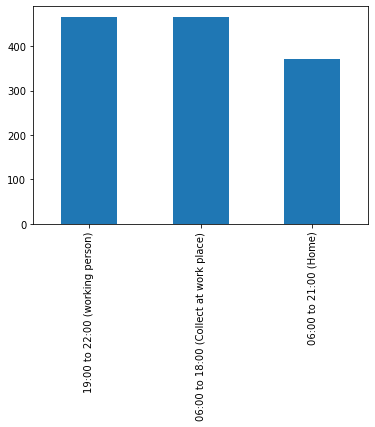

In [175]:
df['Time slot'].value_counts().plot(kind = 'bar')

<AxesSubplot:>

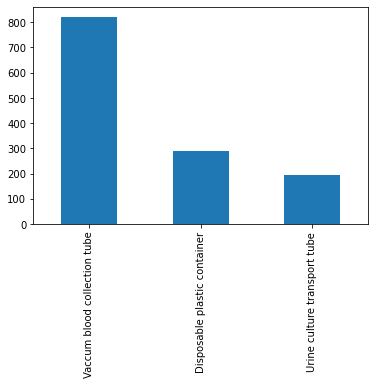

In [176]:
df['Specimen Storage'].value_counts().plot(kind = 'bar')

In [177]:
len(df['Patient Availabilty'].unique())

17

<AxesSubplot:>

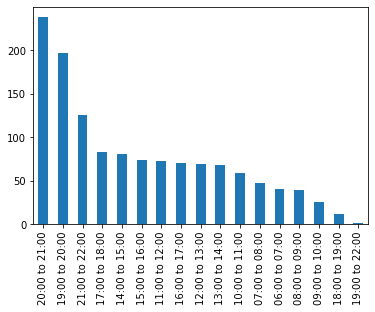

In [178]:
df['Patient Availabilty'].value_counts().plot(kind = 'bar')

In [179]:
len(df['Agent Arrival Time'].unique())

16

<AxesSubplot:>

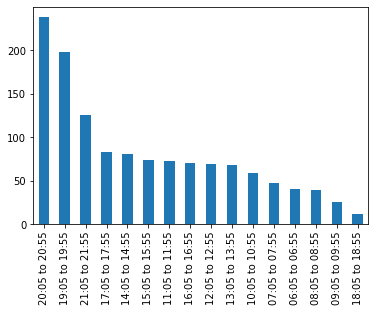

In [181]:
df['Agent Arrival Time'].value_counts().plot(kind = "bar")

<AxesSubplot:>

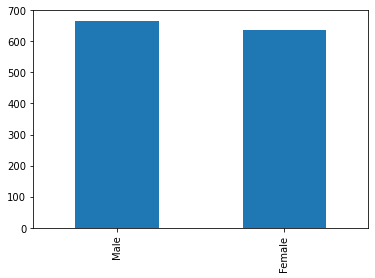

In [182]:
df['Gender'].value_counts().plot(kind = 'bar')

In [183]:
df.head(10)

,Agent ID,Diagnostic Centers,Time slot,Distance Agent-Pathlab,Distance Patient-Pathlab,Patient Availabilty,Gender,Specimen Storage,Distance Patient-Agent,Agent-Pathlab sec,Specimen collection Time,Agent Arrival Time,Exact Arrival Time
0,26,Medquest Diagnostics Center,06:00 to 21:00 (Home),2713,2840,09:00 to 10:00,Female,Vaccum blood collection tube,778,271.3,11,09:05 to 09:55,34
1,40,Medquest Diagnostics Center,19:00 to 22:00 (working person),2490,1378,19:00 to 20:00,Male,Vaccum blood collection tube,1126,249.0,10,19:05 to 19:55,39
2,19,Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),4849,4458,14:00 to 15:00,Male,Vaccum blood collection tube,416,484.9,12,14:05 to 14:55,24
3,45,Medquest Diagnostics Center,19:00 to 22:00 (working person),4348,2316,21:00 to 22:00,Female,Vaccum blood collection tube,3843,434.8,7,21:05 to 21:55,39
4,12,Medquest Diagnostics Center,06:00 to 18:00 (Collect at work place),2725,4377,13:00 to 14:00,Male,Vaccum blood collection tube,2818,272.5,10,13:05 to 13:55,39
5,17,Vijaya Diagnostic Center,06:00 to 21:00 (Home),6828,5301,07:00 to 08:00,Male,Vaccum blood collection tube,2447,682.8,9,07:05 to 07:55,39
6,43,Vijaya Diagnostic Center,19:00 to 22:00 (working person),8326,6268,20:00 to 21:00,Male,Urine culture transport tube,5332,832.6,11,20:05 to 20:55,49
7,14,Vijaya Diagnostic Center,06:00 to 18:00 (Collect at work place),2518,3321,16:00 to 17:00,Female,Disposable plastic container,3175,251.8,11,16:05 to 16:55,39
8,14,Vijaya Diagnostic Center,06:00 to 21:00 (Home),5626,2099,06:00 to 07:00,Female,Disposable plastic container,5381,562.6,7,06:05 to 06:55,49
9,27,Vijaya Diagnostic Center,19:00 to 22:00 (working person),8022,9724,20:00 to 21:00,Male,Vaccum blood collection tube,1807,802.2,18,20:05 to 20:55,39


In [184]:
df = df[df['Distance Patient-Agent'] != 0]


<AxesSubplot:xlabel='Distance Patient-Agent', ylabel='Density'>

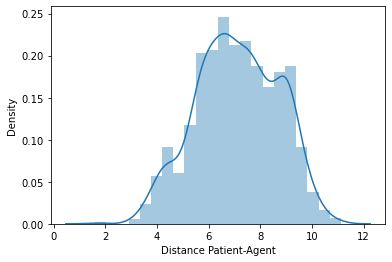

In [186]:
sns.distplot(np.log(df['Distance Patient-Agent']))


In [148]:
# Model Building
from sklearn.model_selection import train_test_split # train and test 
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

In [187]:
# Patient Availabity
df = df[df['Patient Availabilty'] != '19:00 to 22:00']
df["Patient Availabilty From"]=df["Patient Availabilty"].apply (lambda x:x.split(":")[0])
a = df['Patient Availabilty'].apply(lambda x:x.split('to')[1])
df['Patient Availabilty To'] = a.apply(lambda x:x.split(':')[0])

In [188]:
b = df['Agent Arrival Time'].apply(lambda x:x.split('to')[1])
df['Agent Arrive Before'] = b.apply(lambda x:x.split(':')[0])

In [189]:
df_A = df.drop(["Patient Availabilty","Diagnostic Centers","Agent Arrival Time"],axis=1)


In [190]:
# Create instance of LableEncoder
labelencoder=LabelEncoder
df_A["Specimen Storage"]=labelencoder().fit_transform(df["Specimen Storage"])
df_A["Time slot"]=labelencoder().fit_transform(df["Time slot"])
df_A["Gender"]=labelencoder().fit_transform(df["Gender"]) 

In [191]:
df_A.head(5)

,Agent ID,Time slot,Distance Agent-Pathlab,Distance Patient-Pathlab,Gender,Specimen Storage,Distance Patient-Agent,Agent-Pathlab sec,Specimen collection Time,Exact Arrival Time,Patient Availabilty From,Patient Availabilty To,Agent Arrive Before
0,26,1,2713,2840,0,2,778,271.3,11,34,09,10,09
1,40,2,2490,1378,1,2,1126,249.0,10,39,19,20,19
2,19,0,4849,4458,1,2,416,484.9,12,24,14,15,14
3,45,2,4348,2316,0,2,3843,434.8,7,39,21,22,21
4,12,0,2725,4377,1,2,2818,272.5,10,39,13,14,13


In [192]:
df_A.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1295 entries, 0 to 1303
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Agent ID                  1295 non-null   int64  
 1   Time slot                 1295 non-null   int32  
 2   Distance Agent-Pathlab    1295 non-null   int64  
 3   Distance Patient-Pathlab  1295 non-null   int64  
 4   Gender                    1295 non-null   int32  
 5   Specimen Storage          1295 non-null   int32  
 6   Distance Patient-Agent    1295 non-null   int64  
 7   Agent-Pathlab sec         1295 non-null   float64
 8   Specimen collection Time  1295 non-null   int64  
 9   Exact Arrival Time        1295 non-null   int64  
 10  Patient Availabilty From  1295 non-null   object 
 11  Patient Availabilty To    1295 non-null   object 
 12  Agent Arrive Before       1295 non-null   object 
dtypes: float64(1), int32(3), int64(6), object(3)
memory usage: 126.

In [193]:
variables = df_A.drop(['Exact Arrival Time'], axis = 1)
target = df_A[['Exact Arrival Time']]

In [194]:
xtrain,xtest,ytrain, ytest = train_test_split(variables,target, test_size = 0.3)


In [195]:
lr = LogisticRegression(multi_class='ovr')
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred))) 
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.6992
Classification Report: 
               precision    recall  f1-score   support

          24       0.96      0.97      0.96       125
          34       0.00      0.00      0.00        68
          39       0.53      1.00      0.69       112
          49       0.66      0.42      0.51        50
          54       0.00      0.00      0.00        16
          64       0.90      1.00      0.95        18

    accuracy                           0.70       389
   macro avg       0.51      0.56      0.52       389
weighted avg       0.59      0.70      0.62       389



In [196]:
# Final model
lr1 = LogisticRegression(multi_class='ovr',
                           penalty = 'l2',
                           solver='newton-cg',
                           C = 16.0,
                           fit_intercept=True,
                           class_weight='balanced',
                           random_state=100
                          ) 
lr1.fit(xtrain, ytrain)
ypred = lr1.predict(xtest)
print('Accruacy score: {:.4f}'.format(accuracy_score(ytest, ypred))) 
print('Classification Report: \n', classification_report(ytest, ypred))

Accruacy score: 0.8869
Classification Report: 
               precision    recall  f1-score   support

          24       0.99      1.00      1.00       125
          34       0.88      0.82      0.85        68
          39       0.89      0.86      0.87       112
          49       0.71      0.96      0.81        50
          54       0.57      0.25      0.35        16
          64       1.00      0.89      0.94        18

    accuracy                           0.89       389
   macro avg       0.84      0.80      0.80       389
weighted avg       0.89      0.89      0.88       389



In [197]:
import pickle
pickle.dump(lr1, open("lg_reg.pkl", "wb"))
pickle.dump(df_A,open("data_set.pkl", "wb"))

In [160]:
from haversine import haversine

In [93]:
lat1 = float(input('latitude 1 : '))
lon1 = float(input('longitude 1 : '))
lat2 = float(input('latitude 2 : '))
lon2 = float(input('longitude 2 : '))

loc1 = (lat1, lon1)
loc2 = (lat2, lon2)
distance = haversine(loc1, loc2, unit='m')
print(int(distance))

latitude 1 : 23.2354657
longitude 1 : 34.2436
latitude 2 : 35.34556
longitude 2 : 23.24356
2490
